<a href="https://colab.research.google.com/github/HigurashiKagome/AI/blob/main/Class11_10%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
  

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr
import pandas as pd

In [ ]:
fdr.__version__

'0.9.50'

In [ ]:
kospi = fdr.DataReader('KS11') # 81.05.01부터 존재

In [ ]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6536 entries, 1996-12-11 to 2022-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6387 non-null   float64
 1   High       6387 non-null   float64
 2   Low        6387 non-null   float64
 3   Close      6387 non-null   float64
 4   Adj Close  6387 non-null   float64
 5   Volume     6387 non-null   float64
dtypes: float64(6)
memory usage: 357.4 KB


In [ ]:
kospi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000.0
1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900.0
1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500.0
1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800.0
1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600.0


In [ ]:
kospi.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-04,2325.850098,2348.429932,2316.290039,2348.429932,2348.429932,436200.0
2022-11-07,2360.219971,2373.280029,2354.219971,2371.790039,2371.790039,392300.0
2022-11-08,2387.199951,2400.389893,2375.669922,2399.040039,2399.040039,499800.0
2022-11-09,2408.540039,2429.649902,2403.639893,2424.409912,2424.409912,680500.0
2022-11-10,2405.770020,2426.100098,2401.989990,2412.370117,2412.370117,550038.0


In [ ]:
kospi.to_csv('kospi_data.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import warnings

# statsmodels
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

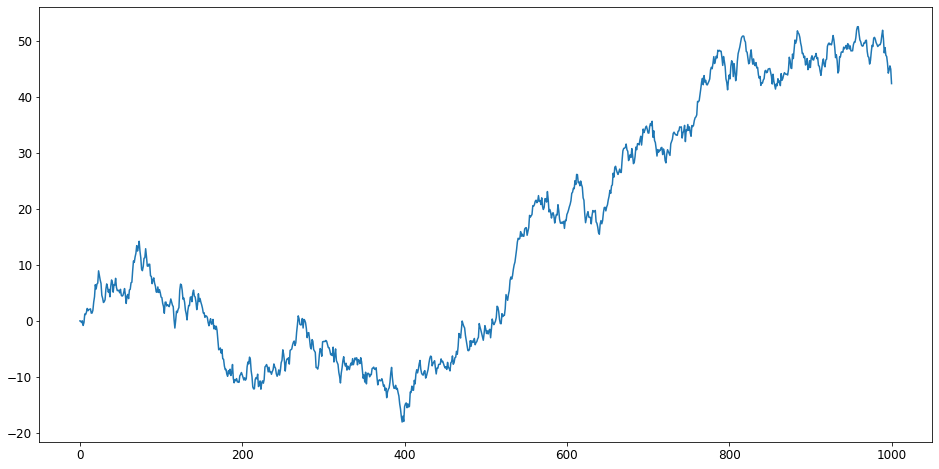

In [ ]:
plt.figure(figsize = (16, 8)) # Set figure size
y = [0] # y_0 = 0
for i in range(1000) :
    y.append(y[i] + np.random.normal(0,1)) # y_t = y_{t - 1} + epsilon_t
plt.plot(y)

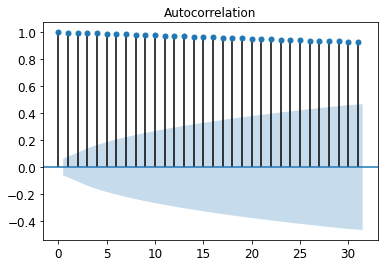

In [ ]:
y = pd.Series(y)
plot_acf(y)
plt.show()

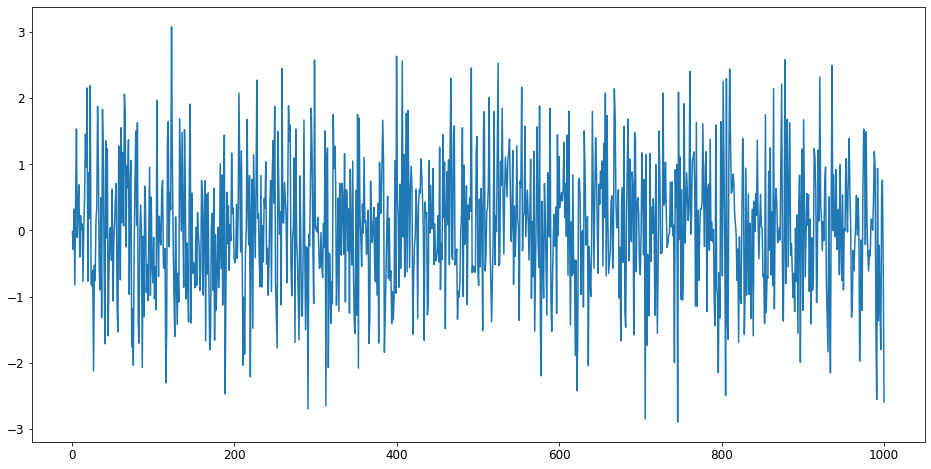

In [ ]:
plt.figure(figsize = (16, 8)) # Set figure size
y_diff = y.diff(1)[1:]
y_diff.plot()

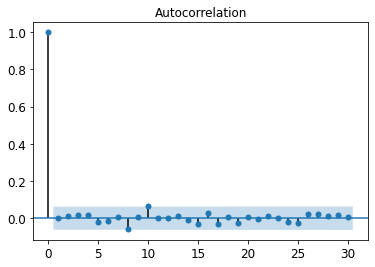

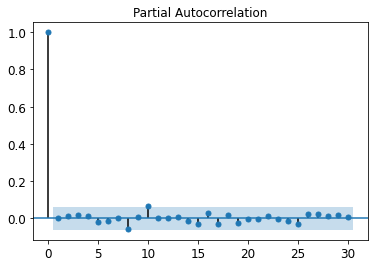

In [ ]:
plot_acf(y_diff)
plot_pacf(y_diff, method = 'ywm')
plt.show()

In [ ]:
kospi = pd.read_csv('kospi_data.csv') 

In [ ]:
kospi

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000.0
1,1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900.0
2,1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500.0
3,1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800.0
4,1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600.0
...,...,...,...,...,...,...,...
6531,2022-11-04,2325.850098,2348.429932,2316.290039,2348.429932,2348.429932,436200.0
6532,2022-11-07,2360.219971,2373.280029,2354.219971,2371.790039,2371.790039,392300.0
6533,2022-11-08,2387.199951,2400.389893,2375.669922,2399.040039,2399.040039,499800.0
6534,2022-11-09,2408.540039,2429.649902,2403.639893,2424.409912,2424.409912,680500.0


In [ ]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6536 entries, 1996-12-11 to 2022-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6387 non-null   float64
 1   High       6387 non-null   float64
 2   Low        6387 non-null   float64
 3   Close      6387 non-null   float64
 4   Adj Close  6387 non-null   float64
 5   Volume     6387 non-null   float64
dtypes: float64(6)
memory usage: 357.4 KB


In [ ]:
round(kospi.describe(), 3)

,Open,High,Low,Close,Adj Close,Volume
count,6387.000,6387.000,6387.000,6387.000,6387.000,6387.000
mean,1562.241,1571.795,1550.381,1561.457,1561.457,435018.309
std,717.977,719.468,715.403,717.531,717.531,273073.966
min,283.410,291.010,277.370,280.000,280.000,13900.000
25%,840.450,850.090,830.190,838.590,838.590,286200.000
50%,1745.770,1757.810,1732.850,1746.240,1746.240,379600.000
75%,2044.810,2051.615,2034.160,2042.155,2042.155,514750.000
max,3305.460,3316.080,3295.440,3305.210,3305.210,3455500.000


In [ ]:
cd /content/drive/MyDrive/ML4AI Team Project

/content/drive/MyDrive/ML4AI Team Project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("train.csv-Grid view (1).csv")
df.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
import numpy as np

X = ['B']
y = ['V40']

Saving figure generated_data_plot


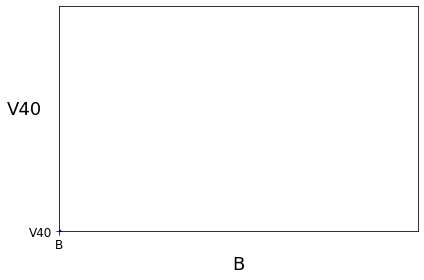

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("B", fontsize=18)
plt.ylabel("V40", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

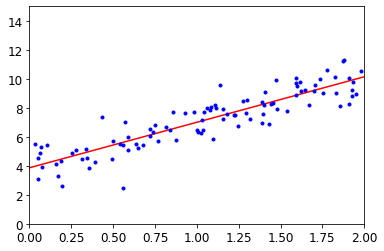

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()